In [1]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use("ggplot")

from continuos_stats import (continuos_marginal_entropy,
                             continuos_join_gaussian_entropy)

from general_stats import (univariate_gaussian,
                           multivariate_gaussian)

In [2]:
# Downloading data
path_data = os.path.join("data", "amostras_continuo.txt")
df = pd.read_csv(path_data, sep=" ", header=None, names=["X1", "X2", "X3", "T"])
print(df.shape)
df.head()

(500, 4)


,X1,X2,X3,T
0,-0.0579,0.0000,0.0000,-1
1,-1.6873,-0.0579,0.0000,-1
2,-8.5791,-1.6873,-0.0579,-1
3,-0.0361,-8.5791,-1.6873,1
4,2.2593,-0.0361,-8.5791,1


<AxesSubplot:>

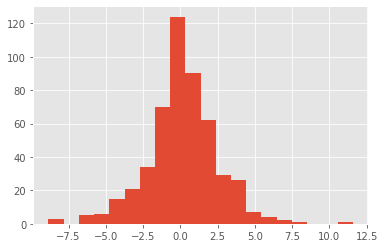

In [10]:
df["X1"].hist(bins=20)

**Entropia - Parzen window**

$$
\hat{J}_{HS} = - \frac{1}{N_x}\sum_{i=1}^{N_x}\log \left(\frac{1}{N_x}\sum_{j=1}^{N_x}G_{\sigma^2}(x_i - x_j)\right)
$$

**Univariate Gaussian:**
$$
G_{\sigma^2}(x_i - x_j) = \frac{1}{\sigma\sqrt{2\pi}} e^{\frac{-(x_i - x_j)}{2\sigma^2}}
$$

In [ ]:
df.apply(continuos_marginal_entropy, args = [univariate_gaussian, 1])

In [ ]:
I(X1, X2) = H(X1) + H(X2) - H(X1,X2) 

# Gaussiana multivariada

$$
G_{\sum}(x_j-x_i) = \frac{e^{\frac{-1}{2}(x_j - x_i)^T\sum^{-1}(x_j - x_i)}}{\sqrt{(2\pi)^{M+1}det(\sum)}} 
$$
onde $M$ é o número de ***RV*** menos um e $\sum$:

$$
\sum = \sigma^{2}I_{M+1}
$$

Podemos utilizar essa definição para calcular as entropias marginais e entropia conjunta.

In [ ]:
N_x = len(df)
sigma = 1

columns = ["X1"]
H = np.power(sigma, 2) * np.eye(len(columns))
Hinv = np.linalg.pinv(H)
Hdet = np.linalg.det(H)
lista = []
for i in df.filter(columns).values:
    fst_sum = sum(multivariate_gaussian(i, j, Hinv, Hdet) for j in df.filter(columns).values)
    lista.append(np.log2(fst_sum/N_x))
    
(-1/N_x) * sum(lista)

In [ ]:
continuos_join_gaussian_entropy(df.filter(columns),sigma=1)

In [ ]:
def get_continuos_mutual_info(df, sigma=1):
    
    marginal_entropy = df.apply(continuos_marginal_entropy, 
                                args = [univariate_gaussian, sigma])
    
    join_entropy = continuos_join_gaussian_entropy(df, sigma=sigma)
        
    return sum(marginal_entropy) - join_entropy

get_continuos_mutual_info(df.filter(["X1", "X2", "X3"]))